# Neurolang

In [ ]:
from tqdm import tqdm_notebook
import pickle
from neurolang.frontend.neurosynth_utils import NeuroSynthHandler

q = 0.00000001
nshandler = NeuroSynthHandler()
neurosynth_data = nshandler.ns_region_set_from_term(
    'auditory',
    q=q
)

file = open("xyz_from_neurosynth.pkl",'rb')
ret = pickle.load(file)
file.close()

In [7]:
from neurolang.regions import Region, ExplicitVBR
from neurolang.regions import region_intersection as region_intersection_

def region_intersec(
    region_left: Region, region_right: Region
) -> Region:
    
    r_ijk = region_right.to_ijk(region_left.affine)
    region_right = ExplicitVBR(r_ijk, region_left.affine, image_dim=region_left.image_dim)
    temp = region_intersection_((region_left, region_right))
    return temp

In [8]:
result = []
from neurolang.regions import EmptyRegion

for index, region_ns in tqdm_notebook(ret.items()):
    for region_auditory in neurosynth_data:
        res = region_intersec(region_ns, region_auditory)
        if not isinstance(res, EmptyRegion):
            result.append((index, res))

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [11]:
from nilearn import datasets
import nibabel as nib
from neurolang.frontend.query_resolution import RegionMixin

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

destrieux = []
for label_number, name in destrieux_dataset['labels']:
    if label_number == 0:
        continue
    name = name.decode()
    region = RegionMixin.create_region(
        destrieux_map, label=label_number
    )
    if region is None:
        continue
    name = name.replace('-', '_').replace(' ', '_').lower()
    destrieux.append((name, region))

In [14]:
inter_regions = []
for ns_index, ns_region in tqdm_notebook(result):
    for dt_name, dt_region in destrieux:
        res = region_intersec(ns_region, dt_region)
        if not isinstance(res, EmptyRegion):
            inter_regions.append((ns_index, dt_name, res))

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [1]:
import pickle

#with open('regiones', 'wb') as fp:
#    pickle.dump(inter_regions, fp)

with open ('regiones', 'rb') as fp:
    inter_regions = pickle.load(fp)

In [2]:
from neurolang.datalog.ontologies_parser import OntologiesParser
from neurolang.datalog.ontologies_rewriter import OntologyRewriter

from neurolang.datalog.constraints_representation import DatalogConstraintsProgram
from neurolang.expression_walker import ExpressionBasicEvaluator

from neurolang import frontend as fe

class Datalog(DatalogConstraintsProgram, ExpressionBasicEvaluator):
    pass

paths = ['./neurofma_fma3.0.owl']
namespaces = ['http://sig.biostr.washington.edu/fma3.0']
onto = OntologiesParser(paths, namespaces)
#dl = Datalog()
nl = fe.NeurolangDL()
datalog_program = onto.parse_ontology(nl.solver)

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/utils/data_manipulation.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gzanit

In [3]:
def get_destrieux_relations():
    return [
        ('l_g_and_s_frontomargin', 'Left frontomarginal gyrus'),
        ('l_g_and_s_occipital_inf', 'Left inferior occipital gyrus'),
        ('l_g_and_s_paracentral', 'Left paracentral lobule'),
        ('l_g_and_s_subcentral', 'Left subcentral gyrus'),
        (
            'l_g_and_s_transv_frontopol',
            'Left superior transverse frontopolar gyrus'
        ),
        ('l_g_and_s_cingul_ant', 'Left anterior cingulate gyrus'),
        (
            'l_g_and_s_cingul_mid_ant',
            'Left anterior middle cingulate gyrus'
        ),
        (
            'l_g_and_s_cingul_mid_post',
            'Left posterior middle cingulate gyrus'
        ),
        (
            'l_g_cingul_post_dorsal',
            'Dorsal segment of left posterior middle cingulate gyrus'
        ),
        (
            'l_g_cingul_post_ventral',
            'Ventral segment of left posterior middle cingulate gyrus'
        ),
        ('l_g_cuneus', 'Left cuneus'),
        (
            'l_g_front_inf_opercular',
            'Opercular part of left inferior frontal gyrus'
        ),
        (
            'l_g_front_inf_orbital',
            'Orbital part of left inferior frontal gyrus'
        ),
        (
            'l_g_front_inf_triangul',
            'Triangular part of left inferior frontal gyrus'
        ),
        ('l_g_front_middle', 'Left middle frontal gyrus'),
        ('l_g_front_sup', 'Left superior frontal gyrus'),
        ('l_g_ins_lg_and_s_cent_ins', 'Left central insular sulcus'),
        ('l_g_ins_lg_and_s_cent_ins', 'Left long insular gyrus'),
        ('l_g_insular_short', 'Short insular gyrus'),
        ('l_g_occipital_middleLeft', ' 	Left lateral occipital gyrus'),
        ('l_g_occipital_sup', 'Left superior occipital gyrus'),
        ('l_g_oc_temp_lat_fusifor', 'Left fusiform gyrus'),
        ('l_g_oc_temp_med_lingual', 'Left lingual gyrus'),
        ('l_g_oc_temp_med_parahip', 'Left parahippocampal gyrus'),
        ('l_g_orbital', 'Left orbital gyrus'),
        ('l_g_pariet_inf_angular', 'Left angular gyrus'),
        ('l_g_pariet_inf_supramar', 'Left supramarginal gyrus'),
        ('l_g_parietal_sup', 'Left superior parietal lobule'),
        ('l_g_postcentral', 'Left postcentral gyrus'),
        ('l_g_precentral', 'Left precentral gyrus'),
        ('l_g_precuneus', 'Left precuneus'),
        ('l_g_rectus', 'Left straight gyrus'),
        ('l_g_subcallosal', 'Left paraterminal gyrus'),
        ('l_g_temp_sup_g_t_transv', 'Left transverse temporal gyrus'),
        ('l_g_temp_sup_lateral', 'Left superior temporal gyrus'),
        ('l_g_temp_sup_plan_polar', 'Left superior temporal gyrus'),
        ('l_g_temp_sup_plan_tempo', 'Left superior temporal gyrus'),
        ('l_g_temporal_inf', 'Left inferior temporal gyrus'),
        ('l_g_temporal_middle', 'Left middle temporal gyrus'),
        (
            'l_lat_fis_ant_horizont',
            'Anterior horizontal limb of left lateral sulcus'
        ),
        (
            'l_lat_fis_ant_vertical',
            'Anterior ascending limb of left lateral sulcus'
        ),
        (
            'l_lat_fis_post',
            'Posterior ascending limb of left lateral sulcus'
        ),
        ('l_lat_fis_post', 'Left lateral sulcus'),
        ('l_pole_occipital', 'Left occipital pole'),
        ('l_pole_temporal', 'Left temporal pole'),
        ('l_s_calcarine', 'Left Calcarine sulcus'),
        ('l_s_central', 'Left central sulcus'),
        ('l_s_cingul_marginalis', 'Left marginal sulcus'),
        ('l_s_circular_insula_ant', 'Circular sulcus of left insula'),
        ('l_s_circular_insula_inf', 'Circular sulcus of left insula'),
        ('l_s_circular_insula_sup', 'Circular sulcus of left insula'),
        ('l_s_collat_transv_ant', 'Left collateral sulcus'),
        ('l_s_collat_transv_post', 'Left collateral sulcus'),
        ('l_s_front_inf', 'Left inferior frontal sulcus'),
        ('l_s_front_sup', 'Left superior frontal sulcus'),
        ('l_s_intrapariet_and_p_trans', 'Left intraparietal sulcus'),
        ('l_s_oc_middle_and_lunatus', 'Left lunate sulcus'),
        ('l_s_oc_sup_and_transversal', 'Left transverse occipital sulcus'),
        ('l_s_occipital_ant', 'Left anterior occipital sulcus'),
        ('l_s_oc_temp_lat', 'Left occipitotemporal sulcus'),
        ('l_s_oc_temp_med_and_lingual', 'Left intralingual sulcus'),
        ('l_s_orbital_lateral', 'Left orbital sulcus'),
        ('l_s_orbital_med_olfact', 'Left olfactory sulcus'),
        ('l_s_orbital_h_shaped', 'Left transverse orbital sulcus'),
        ('l_s_orbital_h_shaped', 'Left orbital sulcus'),
        ('l_s_parieto_occipital', 'Left parieto-occipital sulcus'),
        ('l_s_pericallosal', 'Left callosal sulcus'),
        ('l_s_postcentral', 'Left postcentral sulcus'),
        ('l_s_precentral_inf_part', 'Left precentral sulcus'),
        ('l_s_precentral_sup_part', 'Left precentral sulcus'),
        ('l_s_suborbital', 'Left fronto-orbital sulcus'),
        ('l_s_subparietal', 'Left subparietal sulcus'),
        ('l_s_temporal_inf', 'Left inferior temporal sulcus'),
        ('l_s_temporal_sup', 'Left superior temporal sulcus'),
        ('l_s_temporal_transverse', 'Left transverse temporal sulcus'),
        ('r_g_and_s_frontomargin', 'Right frontomarginal gyrus'),
        ('r_g_and_s_occipital_inf', 'Right inferior occipital gyrus'),
        ('r_g_and_s_paracentral', 'Right paracentral lobule'),
        ('r_g_and_s_subcentral', 'Right subcentral gyrus'),
        (
            'r_g_and_s_transv_frontopol',
            'Right superior transverse frontopolar gyrus'
        ),
        ('r_g_and_s_cingul_ant', 'Right anterior cingulate gyrus'),
        (
            'r_g_and_s_cingul_mid_ant',
            'Right anterior middle cingulate gyrus'
        ),
        (
            'r_g_and_s_cingul_mid_post',
            'Right posterior middle cingulate gyrus'
        ),
        (
            'r_g_cingul_post_dorsal',
            'Dorsal segment of right posterior middle cingulate gyrus'
        ),
        (
            'r_g_cingul_post_ventral',
            'Ventral segment of right posterior middle cingulate gyrus'
        ),
        ('r_g_cuneus', 'Right cuneus'),
        (
            'r_g_front_inf_opercular',
            'Opercular part of right inferior frontal gyrus'
        ),
        (
            'r_g_front_inf_orbital',
            'Orbital part of right inferior frontal gyrus'
        ),
        (
            'r_g_front_inf_triangul',
            'Triangular part of right inferior frontal gyrus'
        ),
        ('r_g_front_middle', 'Right middle frontal gyrus'),
        ('r_g_front_sup', 'Right superior frontal gyrus'),
        ('r_g_ins_lg_and_s_cent_ins', 'Right central insular sulcus'),
        ('r_g_ins_lg_and_s_cent_ins', 'Right long insular gyrus'),
        ('r_g_insular_short', 'Right short insular gyrus'),
        ('r_g_occipital_middle', 'Right lateral occipital gyrus'),
        ('r_g_occipital_sup', 'Right superior occipital gyrus'),
        ('r_g_oc_temp_lat_fusifor', 'Right fusiform gyrus'),
        ('r_g_oc_temp_med_lingual', 'Right lingual gyrus'),
        ('r_g_oc_temp_med_parahip', 'Right parahippocampal gyrus'),
        ('r_g_orbital', 'Right orbital gyrus'),
        ('r_g_pariet_inf_angular', 'Right angular gyrus'),
        ('r_g_pariet_inf_supramar', 'Right supramarginal gyrus'),
        ('r_g_parietal_sup', 'Right superior parietal lobule'),
        ('r_g_postcentral', 'Right postcentral gyrus'),
        ('r_g_precentral', 'Right precentral gyrus'),
        ('r_g_precuneus', 'Right precuneus'),
        ('r_g_rectus', 'Right straight gyrus'),
        ('r_g_subcallosal', 'Right paraterminal gyrus'),
        ('r_g_temp_sup_g_t_transv', 'Right transverse temporal gyrus'),
        ('r_g_temp_sup_lateral', 'Right superior temporal gyrus'),
        ('r_g_temp_sup_plan_polar', 'Right superior temporal gyrus'),
        ('r_g_temp_sup_plan_tempo', 'Right superior temporal gyrus'),
        ('r_g_temporal_inf', 'Right inferior temporal gyrus'),
        ('r_g_temporal_middle', 'Right middle temporal gyrus'),
        (
            'r_lat_fis_ant_horizont',
            'Anterior horizontal limb of right lateral sulcus'
        ),
        (
            'r_lat_fis_ant_vertical',
            'Anterior ascending limb of right lateral sulcus'
        ),
        ('r_lat_fis_post', 'Right lateral sulcus'),
        (
            'r_lat_fis_post',
            'Posterior ascending limb of right lateral sulcus'
        ),
        ('r_pole_occipital', 'Right occipital pole'),
        ('r_pole_temporal', 'Right temporal pole'),
        ('r_s_calcarine', 'Right Calcarine sulcus'),
        ('r_s_central', 'Right central sulcus'),
        ('r_s_cingul_marginalis', 'Right marginal sulcus'),
        ('r_s_circular_insula_ant', 'Circular sulcus of Right insula'),
        ('r_s_circular_insula_inf', 'Circular sulcus of Right insula'),
        ('r_s_circular_insula_sup', 'Circular sulcus of Right insula'),
        ('r_s_collat_transv_ant', 'Right collateral sulcus'),
        ('r_s_collat_transv_post', 'Right collateral sulcus'),
        ('r_s_front_inf', 'Right inferior frontal sulcus'),
        ('r_s_front_sup', 'Right superior frontal sulcus'),
        ('r_s_intrapariet_and_p_trans', 'Right intraparietal sulcus'),
        ('r_s_oc_middle_and_lunatus', 'Right lunate sulcus'),
        (
            'r_s_oc_sup_and_transversal',
            'Right transverse occipital sulcus'
        ),
        ('r_s_occipital_ant', 'Right anterior occipital sulcus'),
        ('r_s_oc_temp_lat', 'Right occipitotemporal sulcus'),
        ('r_s_oc_temp_med_and_lingual', 'Right intralingual sulcus'),
        ('r_s_orbital_lateral', 'Right orbital sulcus'),
        ('r_s_orbital_med_olfact', 'Right olfactory sulcus'),
        ('r_s_orbital_h_shaped', 'Right orbital sulcus'),
        ('r_s_orbital_h_shaped', 'Right transverse orbital sulcus'),
        ('r_s_parieto_occipital', 'Right parieto-occipital sulcus'),
        ('r_s_pericallosal', 'Right callosal sulcus'),
        ('r_s_postcentral', 'Right postcentral sulcus'),
        ('r_s_precentral_inf_part', 'Right precentral sulcus'),
        ('r_s_precentral_sup_part', 'Right precentral sulcus'),
        ('r_s_suborbital', 'Right fronto-orbital sulcus'),
        ('r_s_subparietal', 'Right subparietal sulcus'),
        ('r_s_temporal_inf', 'Right inferior temporal sulcus'),
        ('r_s_temporal_sup', 'Right superior temporal sulcus'),
        ('r_s_temporal_transverse', 'Right transverse temporal sulcus'),
    ]

In [ ]:
import nibabel as nib
import numpy as np
import neurolang.regions as nlr
import os
import neurosynth

def get_xyz_from_neurosynth():
    
    ns_base_img = nib.load(
    os.path.join(
        neurosynth.__path__[0], "resources/MNI152_T1_2mm_brain.nii.gz",
        )
    )

    ns_masker = neurosynth.mask.Masker(
        os.path.join(
            neurosynth.__path__[0], "resources/MNI152_T1_2mm_brain.nii.gz",
        )
    )

    ns_affine = ns_base_img.affine

    voxels = np.ones(shape=ns_masker.mask(ns_base_img.get_data()).shape)
    unmasked = ns_masker.unmask(voxels)
    ijk = np.argwhere(unmasked > 0)
    ret = {}
    regions = [
        nlr.ExplicitVBR(
            [coords],
            affine_matrix=ns_affine,
            image_dim=ns_base_img.get_data().shape,
        )
        for coords in ijk
    ]
    for vid, region in zip(range(voxels.shape[0]), regions):
        ret[vid] = region
        
    return ret

#ret = get_xyz_from_neurosynth()

#import pickle
#f = open("xyz_from_neurosynth.pkl","wb")
#pickle.dump(ret, f)
#f.close()

In [4]:
def voxels_to_regions_prob(voxels):
    regions = []
    for index, row in voxels.iterrows():
        prob = row['prob']
        v_name = index[1]
        region = ret[v_name]
        regions.append((v_name, region, prob))
    
    return regions

def voxels_to_regions(voxels):
    regions = []
    for index, row in voxels.iterrows():
        v_name = index[1]
        region = ret[v_name]
        regions.append((v_name, region))
    
    return regions

In [ ]:
import pickle

file = open("xyz_from_neurosynth.pkl",'rb')
ret = pickle.load(file)
file.close()

In [5]:
import pandas as pd

prob_terms = pd.read_hdf('neurosynth_prob.h5', key='terms')
prob_voxels = pd.read_hdf('neurosynth_prob.h5', key='voxels')
prob_terms_voxels = pd.read_hdf('neurosynth_prob.h5', key='terms_voxels')

prob_terms_voxels = prob_terms_voxels[prob_terms_voxels.index.get_level_values('term') == 'auditory']
prob_terms = prob_terms[prob_terms['index'] == 'auditory']
#auditory_regions = voxels_to_regions(prob_terms_voxels)

prob_terms = prob_terms[['proba', 'index']]

prob_voxels.reset_index(inplace=True)
prob_voxels.rename(columns={0: 'prob'}, inplace=True)
prob_voxels = prob_voxels[['prob', 'index']]

prob_terms_voxels.reset_index(inplace=True)
prob_terms_voxels = prob_terms_voxels[['prob', 'term', 'variable']]

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
from neurolang.logic import Implication
from nilearn import datasets
import nibabel as nib
from neurolang.frontend.query_resolution import RegionMixin
from neurolang.expressions import ExpressionBlock, Symbol, Constant
from neurolang.logic import Implication
from neurolang.regions import Region, region_union as region_union_
import typing 

S_ = Symbol
C_ = Constant

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

relation_region = S_('relation_region')
relation_name = S_('relation_name')
neurosynth = Symbol('neurosynth')

destrieux = []
for label_number, name in destrieux_dataset['labels']:
    if label_number == 0:
        continue
    name = name.decode()
    region = RegionMixin.create_region(
        destrieux_map, label=label_number
    )
    if region is None:
        continue
    name = name.replace('-', '_').replace(' ', '_').lower()
    destrieux.append((name, region))
    
r_region = tuple([relation_region(C_(region), C_(name)) for name, region in destrieux])

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [7]:
from operator import eq
from neurolang.logic import Implication
from nilearn import datasets
import nibabel as nib
from neurolang.frontend.query_resolution import RegionMixin
from neurolang.expressions import ExpressionBlock, Symbol, Constant
from neurolang.logic import Implication
from neurolang.datalog.aggregation import AggregationApplication

inter_reg = Symbol('inter_reg')
active_region = Symbol('active_region')

w = Symbol('w')
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
eq_ = Constant(eq)
id_ = Symbol('id_')
reg = Symbol('reg')
ans = Symbol('ans')
over = Symbol('over')
sub = Symbol('sub')

neurosynth_region = Symbol('neurosynth_region')
neurosynth_rv = Symbol('neurosynth_rv')
region2voxel = Symbol('region2voxel')

label = Symbol('http://www.w3.org/2000/01/rdf-schema#label')
subClassOf = Symbol('http://www.w3.org/2000/01/rdf-schema#subClassOf')
region = Symbol('region')
regional_part = Symbol('http://sig.biostr.washington.edu/fma3.0#regional_part_of')

relations_list = get_destrieux_relations()
r_name = tuple([relation_name(C_(destrieux), C_(fma)) for destrieux, fma in relations_list])

@nl.add_symbol
def region_volume(region: fe.ExplicitVBR) -> float:
    volume = (
        len(region.voxels) *
        float(np.product(np.abs(np.linalg.eigvals(region.affine[:-1, :-1]))))
    )
    return volume  

@nl.add_symbol
def region_union(
    region_set: typing.AbstractSet[Region]
) -> Region:
    return region_union_(region_set)

@nl.add_symbol
def region_intersection(
    region_left: Region, region_right: Region
) -> Region:
    
    r_ijk = region_right.to_ijk(region_left.affine)
    region_right = ExplicitVBR(r_ijk, region_left.affine, image_dim=region_left.image_dim)
    temp = region_intersection_((region_left, region_right))
    if temp is None:
        return ExplicitVBR([[0,0,0]], region_left.affine)
    return temp


region_union = nl.symbols.region_union.expression()
region_union.args = (z,)

region_intersection = nl.symbols.region_intersection.expression()
region_intersection.args = (x, y)

agap = AggregationApplication(region_union.functor, (z,))

overlapping = nl.symbols.overlapping.expression()
overlapping.args = (x,y)

#Auditory
imps = tuple()
imps += (Implication(id_(y), label(y, C_('Temporal lobe'))),)
imps += (Implication(reg(x), regional_part(x, y) & id_(y)),)
#imps += (Implication(reg(y), regional_part(y, x) & reg(x)),)
imps += (Implication(sub(y), subClassOf(y, x) & reg(x)),)
imps += (Implication(sub(x), subClassOf(x, y) & sub(y)),)
imps += (Implication(region(z), sub(x) & label(x, y) & relation_name(z, y)),)
imps += (Implication(active_region(x, z), inter_reg(x, y, z) & region(y)),)
#imps += (Implication(over(w, z), neurosynth_rv(w, y) & destrieux_region(x) & overlapping & eq_(z, region_intersection)),)

#qB2 = ExpressionBlock((e.expression for e in nl.current_program))
qB2 = ExpressionBlock(imps)

from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.datalog.aggregation import DatalogWithAggregationMixin

class DatalogTranslator(
    TranslateToLogic, ew.IdentityWalker, DatalogWithAggregationMixin
):
    pass

dt = DatalogTranslator()
qB2 = dt.walk(qB2)

In [8]:
const = datalog_program.get_constraints()
const = dt.walk(const)

orw = OntologyRewriter(qB2, const)
rewrite = orw.Xrewrite()

from neurolang.datalog import DatalogProgram
from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.regions import region_intersection as region_intersection_, ExplicitVBR
from neurolang.datalog.aggregation import DatalogWithAggregationMixin
    
triple = Symbol('triple')
class Datalog2(TranslateToLogic,
    DatalogWithAggregationMixin, DatalogProgram,
    ExpressionBasicEvaluator):
    pass

dl2 = Datalog2()
dl2.add_extensional_predicate_from_tuples(triple, [(a.args[0].value, a.args[1].value, a.args[2].value) for a in onto.triples])
dl2.add_extensional_predicate_from_tuples(inter_reg, [(ns, ds, region) for ns, ds, region in inter_regions])
dl2.add_extensional_predicate_from_tuples(relation_name, [(a.args[0].value, a.args[1].value) for a in r_name])



In [9]:
eB2 = ()
for imp in rewrite:
    eB2 += (imp[0],)
    
eB2 = ExpressionBlock(eB2)


dt = DatalogTranslator()
eB22 = dt.walk(eB2)
dl2.walk(eB22)

from neurolang.datalog.chase import ChaseSemiNaive, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
from neurolang.datalog.aggregation import Chase

class Chase2(
    Chase, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
):
    pass

dc = Chase2(dl2)
solution_instance = dc.build_chase_solution()
list(solution_instance.keys())

/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/datalog/aggregation.py:131: UserWarning: No check performed. Should implement check for stratified aggregation
  "No check performed. Should implement check for stratified"
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


[S{relation_name: typing.AbstractSet[typing.Tuple[str, str]]},
 S{triple: typing.AbstractSet[typing.Tuple[str, str, str]]},
 S{inter_reg: typing.AbstractSet[typing.Tuple[int, str, neurolang.regions.ExplicitVBR]]},
 S{id_: Unknown},
 S{sub: Unknown},
 S{reg: Unknown},
 S{region: Unknown},
 S{active_region: Unknown}]

In [10]:
list_regions = list(solution_instance['active_region'].value.unwrapped_iter())

In [11]:
#activated_voxels = [voxel for voxel, region in list_regions]

In [12]:
#filtered_ptv = prob_terms_voxels[prob_terms_voxels['variable'].isin(activated_voxels)]

In [13]:
from neurolang.datalog import DatalogProgram
from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.regions import region_intersection as region_intersection_, ExplicitVBR
from neurolang.datalog.aggregation import DatalogWithAggregationMixin
from neurolang.probabilistic.probdatalog import (
    ProbDatalogExistentialTranslator,
    GDatalogToProbDatalog,
    ProbDatalogProgram,
    conjunct_formulas,
    is_probabilistic_fact,
    ground_probdatalog_program,
)

dlProb = ProbDatalogProgram()

activated = Symbol('activated')
term = Symbol('term')
term_voxel = Symbol('term_voxel')

#dl2.add_extensional_predicate_from_tuples(triple, [(a.args[0].value, a.args[1].value, a.args[2].value) for a in onto.triples])
#dl2.add_extensional_predicate_from_tuples(relation_region, [(a.args[0].value, a.args[1].value) for a in r_region])
#dl2.add_extensional_predicate_from_tuples(relation_name, [(a.args[0].value, a.args[1].value) for a in r_name])
#dl2.add_extensional_predicate_from_tuples(neurosynth, [(C_('auditory'), reg) for reg, _ in auditory_regions])
#dl2.add_extensional_predicate_from_tuples(neurosynth_term, [(C_(row[0]), C_(row[1])) for index, row in auditory_term.iterrows()])
#dl2.add_extensional_predicate_from_tuples(voxel2region, set(auditory_regions))

dlProb.add_extensional_predicate_from_tuples(activated, set(list_regions))
dlProb.add_probfacts_from_tuples(term,  set(prob_terms.itertuples(index=False, name=None)))
#dlProb.add_probfacts_from_tuples(voxel, set(prob_voxels.itertuples(index=False, name=None)))
dlProb.add_probfacts_from_tuples(term_voxel, set(prob_terms_voxels.itertuples(index=False, name=None)))

#datalog_program = onto.parse_ontology(dlProb)


/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/solver_datalog_naive.py:24: UserWarning: This module is being deprecated please use the datalog module
  warn("This module is being deprecated please use the datalog module")
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/expression_pattern_matching.py:87: UserWarning: Warning in class SolverNonRecursiveDatalogNaive overwrites ['fact', 'statement_intensional'] from base DatalogProgram[typing.Any]
  warn(warn_message)


In [14]:
from neurolang.region_solver import RegionSolver
class DatalogRegions(
    TranslateToLogic, RegionSolver, DatalogWithAggregationMixin, DatalogProgram, ExpressionBasicEvaluator
):
    pass

In [15]:
from importlib import reload

import neurolang.datalog.chase as ch 
import neurolang.datalog.aggregation as ag
reload(ch)
reload(ag)
class ChaseP(
    ch.ChaseNaive, ch.ChaseNamedRelationalAlgebraMixin, ch.ChaseGeneral
):
    pass

In [16]:
prob_terms_voxels.head()

,prob,term,variable
0,0.000765,auditory,0
1,0.000905,auditory,1
2,0.000905,auditory,2
3,0.000487,auditory,9
4,0.000696,auditory,11


In [17]:
over = Symbol('over')

imps2 = tuple()
imps2 += (Implication(over(z), term_voxel(y, z) & activated(z, x)),)
eb = ExpressionBlock(imps2)

dt2 = DatalogTranslator()
eb = dt2.walk(eb)
dlProb.walk(eb)

# calcular uno sobre otro
# el test de neurosynth usa la media de todo, en nuestro caso es mas alta, restriccion mas abierta (discusion)

∪(Implication{λ{S{over: Unknown}: Unknown}(S{z: Unknown}) ← ⋀(λ{S{term_voxel: Unknown}: Unknown}(S{y: Unknown}, S{z: Unknown}), λ{S{activated: Unknown}: Unknown}(S{z: Unknown}, S{x: Unknown}))})

In [18]:
from neurolang.probabilistic.probdatalog import probdatalog_to_datalog, build_grounding

dl_program = probdatalog_to_datalog(dlProb, datalog=DatalogRegions)
dc = ChaseP(dl_program)
solution_instance = dc.build_chase_solution()
grounded = build_grounding(dlProb, solution_instance)
list(solution_instance.keys())

[S{term: typing.AbstractSet[typing.Tuple[float, str]]},
 S{activated: typing.AbstractSet[typing.Tuple[int, neurolang.regions.ExplicitVBR]]},
 S{term_voxel: typing.AbstractSet[typing.Tuple[float, str, int]]},
 S{over: Unknown}]

In [19]:
from importlib import reload
import neurolang.probabilistic.probdatalog_gm as asd
asd = reload(asd)

gm = asd.TranslateGroundedProbDatalogToGraphicalModel().walk(grounded)
query = asd.SuccQuery(over(z))
solver = asd.QueryGraphicalModelSolver(gm)
result = solver.walk(query)

In [20]:
a = result.value.to_numpy()
a[0][4]

502

In [21]:
termProb = prob_terms.proba.values[0]

# P(voxel, term) / P(term)

In [22]:
import numpy as np
prob_img = nib.spatialimages.SpatialImage(
    np.zeros(a[0][2].image_dim, dtype=float),
    affine=a[0][2].affine
)

for p in a:
    prob_img.dataobj[tuple(p[2].voxels.T)] = p[0]/termProb

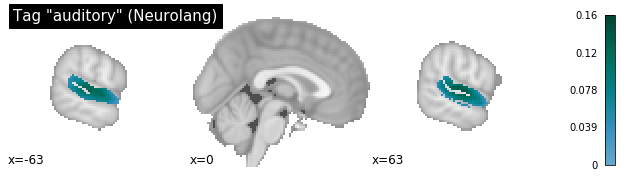

In [65]:
from nilearn import plotting
#plotting.plot_stat_map(prob_img, title='Tag "auditory" (Neurolang)')

plotting.plot_stat_map(
    prob_img, title='Tag "auditory" (Neurolang)', 
    cmap='PuBuGn',
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3),
)

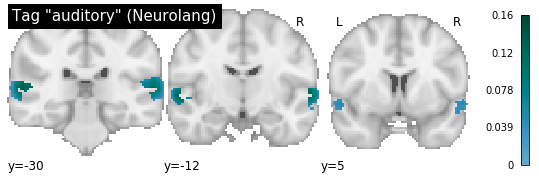

In [66]:
plotting.plot_stat_map(
    prob_img, title='Tag "auditory" (Neurolang)', 
    cmap='PuBuGn',
    display_mode='y',
    cut_coords=np.linspace(-30, 5, 3),
)

In [28]:
prob = prob_img.get_data()

In [29]:
prob_mask = prob > 0
prob_mask_values = prob[prob_mask]

In [30]:
import numpy as np
from scipy import special
from scipy.stats import norm

def p_to_z(p, sign):
    p = p / 2  # convert to two-tailed
    # prevent underflow
    p[p < 1e-240] = 1e-240
    # Convert to z and assign tail
    z = np.abs(norm.ppf(p)) * sign
    # Set very large z's to max precision
    z[np.isinf(z)] = norm.ppf(1e-240) * -1
    return z

def one_way(data, n):
    """ One-way chi-square test of independence.
    Takes a 1D array as input and compares activation at each voxel to
    proportion expected under a uniform distribution throughout the array. Note
    that if you're testing activation with this, make sure that only valid
    voxels (e.g., in-mask gray matter voxels) are included in the array, or
    results won't make any sense!
    """
    term = data.astype('float64')
    no_term = n - term
    t_exp = np.mean(term, 0)
    t_exp = np.array([t_exp, ] * data.shape[0])
    nt_exp = n - t_exp
    t_mss = (term - t_exp) ** 2 / t_exp
    nt_mss = (no_term - nt_exp) ** 2 / nt_exp
    chi2 = t_mss + nt_mss
    return special.chdtrc(1, chi2)

res = one_way(np.round(prob_mask_values * 10000), 10000)

In [31]:
def fdr(p, q=.05):
    """ Determine FDR threshold given a p value array and desired false
    discovery rate q. """
    s = np.sort(p)
    nvox = p.shape[0]
    null = np.array(range(1, nvox + 1), dtype='float') * q / nvox
    below = np.where(s <= null)[0]
    return s[max(below)] if len(below) else -1

p_values_corrected = fdr(res, q=1e-25)

In [32]:
p_values_corrected

7.245924712541483e-27

In [33]:
p_value_image = np.zeros_like(prob)
p_value_image[prob_mask] = -np.log10(res)

p_value_image = nib.spatialimages.SpatialImage(p_value_image, affine=prob_img.affine)

In [34]:
-np.log10(p_values_corrected)

26.139906182735604

In [35]:
from matplotlib import pyplot as plt

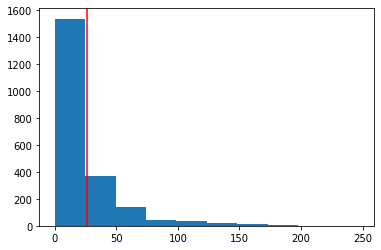

In [36]:
plt.hist(-np.log10(res))
plt.axvline(-np.log10(p_values_corrected), c='r')

(array([1.224e+03, 3.600e+02, 1.340e+02, 4.300e+01, 3.400e+01, 2.000e+01,
        1.000e+01, 8.000e+00, 2.000e+00, 1.000e+00]),
 array([  1.42921667,  25.98977977,  50.55034287,  75.11090598,
         99.67146908, 124.23203218, 148.79259528, 173.35315838,
        197.91372149, 222.47428459, 247.03484769]),
 <a list of 10 Patch objects>)

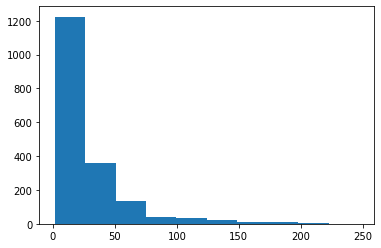

In [37]:
plt.hist(p_value_image.get_data()[p_value_image.get_data() > 1.4])

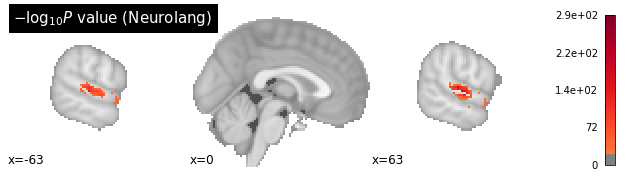

In [38]:
plotting.plot_stat_map(
    p_value_image, title=r'$-\log_{10} P$ value (Neurolang)', 
    threshold=-np.log10(p_values_corrected), 
    cmap='YlOrRd',
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3),
    vmax=2.9e+02
)

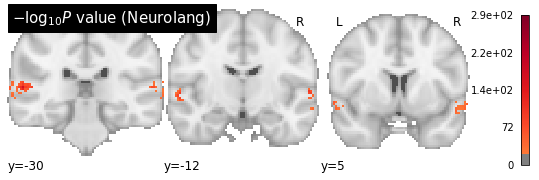

In [39]:
plotting.plot_stat_map(
    p_value_image, title=r'$-\log_{10} P$ value (Neurolang)', 
    threshold=-np.log10(p_values_corrected),
    cmap='YlOrRd',
    display_mode='y',
    cut_coords=np.linspace(-30, 5, 3),
    vmax=2.9e+02
)

In [25]:
2.9e+02 > 2.5e+02

True

In [178]:
#plotting.view_img_on_surf(p_value_image, threshold=-np.log10(p_values_corrected), cmap='YlOrRd',)

In [256]:
prob_voxels[prob_voxels.index == 0].prob.values[0]

0.005010089764108271

# P(term, voxel) / P(voxel)

In [48]:
import numpy as np
prob_img2 = nib.spatialimages.SpatialImage(
    np.zeros(a[0][2].image_dim, dtype=float),
    affine=a[0][2].affine
)
for p in a:
    vox = p[4]
    vox_prob = prob_voxels[prob_voxels.index == vox].prob.values[0]
    prob_img2.dataobj[tuple(p[2].voxels.T)] = p[0]/vox_prob

In [57]:
from nilearn import plotting
#plotting.plot_stat_map(prob_img, title='Tag "auditory" (Neurolang)')

plotting.plot_stat_map(
    prob_img2, title='Tag "auditory" (Neurolang)', 
    cmap='Reds',
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3)
)

NameError: name 'prob_img2' is not defined

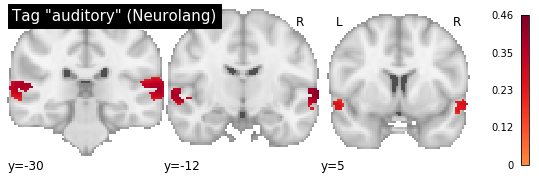

In [50]:
plotting.plot_stat_map(
    prob_img2, title='Tag "auditory" (Neurolang)', 
    cmap='YlOrRd',
    display_mode='y',
    cut_coords=np.linspace(-30, 5, 3)
)

In [274]:
prob2 = prob_img2.get_data()
prob_mask2 = prob2 > 0
prob_mask_values2 = prob2[prob_mask2]

In [275]:
res2 = one_way(np.round(prob_mask_values2 * 10000), 10000)

In [276]:
p_values_corrected2 = fdr(res2)

In [277]:
p_value_image2 = np.zeros_like(prob2)
p_value_image2[prob_mask2] = -np.log10(res2)

p_value_image2 = nib.spatialimages.SpatialImage(p_value_image2, affine=prob_img2.affine)

In [278]:
-np.log10(p_values_corrected2)

1.3580904165527146

# Neurosynth

### Basic

In [4]:
from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.datalog.aggregation import DatalogWithAggregationMixin
from neurolang.datalog.chase import ChaseSemiNaive, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
from neurolang.datalog.aggregation import Chase
from neurolang.expressions import ExpressionBlock, Symbol, Constant
from neurolang.logic import Implication
from neurolang.frontend.neurosynth_utils import NeuroSynthHandler
from neurolang.datalog import DatalogProgram
from neurolang.expression_walker import ExpressionBasicEvaluator
from neurolang.datalog.aggregation import AggregationApplication
from neurolang.regions import Region, region_union as region_union_
import typing 

class DatalogTranslator(
    TranslateToLogic, ew.IdentityWalker, DatalogWithAggregationMixin
):
    pass

class Chase2(
    Chase, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
):
    pass

class Datalog2(TranslateToLogic,
    DatalogWithAggregationMixin, DatalogProgram,
    ExpressionBasicEvaluator):
    pass

C_ = Constant
S_ = Symbol

y = S_('y')
z = S_('z')
over = S_('over')
neurosynth = S_('neurosynth')

from neurolang import frontend as fe
nl = fe.NeurolangDL()
@nl.add_symbol
def region_union(
    region_set: typing.AbstractSet[Region]
) -> Region:
    return region_union_(region_set)

region_union = nl.symbols.region_union.expression()
region_union.args = (z,)

agap = AggregationApplication(region_union.functor, (y,))

imps = tuple()
imps += (Implication(over(agap), neurosynth(C_('auditory'), y)),)
qB2 = ExpressionBlock(imps)
dt = DatalogTranslator()
qB2 = dt.walk(qB2)

q = 0.00000001
nshandler = NeuroSynthHandler()
neurosynth_data = nshandler.ns_region_set_from_term(
    'auditory',
    q=q
)

dl2 = Datalog2()
dl2.add_extensional_predicate_from_tuples(neurosynth, [('auditory', a) for a in neurosynth_data])
                     

eB22 = dt.walk(qB2)
dl2.walk(eB22)

dc = Chase2(dl2)
solution_instance = dc.build_chase_solution()
list(solution_instance.keys())

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:435: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/frontend/neurosynth_data/dataset.pkl'>
  dataset = pickle.load(open(filename, 'rb'))
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:771: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  columns=self.data['columns']).to_sparse()
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:716: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  feature_weights = self.data.ix[:, features]
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/pandas/core/indexing

[S{neurosynth: typing.AbstractSet[typing.Tuple[str, neurolang.regions.ExplicitVBR]]},
 S{over: Unknown}]

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/nilearn/plotting/displays.py:600: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(axes, collections.Sequence):


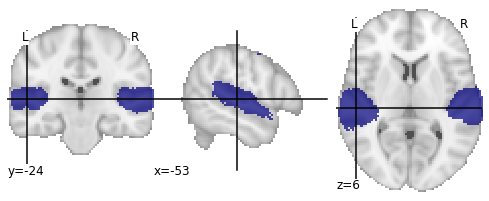

In [5]:
from nilearn import plotting

list_regions = list(solution_instance['over'].value.unwrapped_iter())
for region in list_regions:
    plotting.plot_roi(region[0].spatial_image())

### Probabilistic

In [1]:
import nibabel
import neurosynth
import os

import pandas as pd
import neurolang.regions as nlr

from nilearn import plotting
import numpy as np

from neurolang.expressions import Symbol, Constant, ExpressionBlock
from neurolang.datalog.expressions import Implication, Fact, Conjunction
from neurolang.probabilistic.expressions import ProbabilisticPredicate
from neurolang.probabilistic.probdatalog import ProbDatalogProgram

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/solver_datalog_naive.py:24: UserWarning: This module is being deprecated please use the datalog module
  warn("This module is being deprecated please use the datalog module")
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/expression_pattern_matching.py:87: UserWarning: Warning in class SolverNonRecursiveDatalogNaive overwrites ['fact', 'statement_intensional'] from base DatalogProgram[typing.Any]
  warn(warn_message)


In [2]:
prob_terms = pd.read_hdf('neurosynth_prob.h5', key='terms')
prob_voxels = pd.read_hdf('neurosynth_prob.h5', key='voxels')
prob_terms_voxels = pd.read_hdf('neurosynth_prob.h5', key='terms_voxels')

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
auditory = prob_terms_voxels[prob_terms_voxels.index.get_level_values('term') == 'auditory']

In [5]:
def get_xyz_from_neurosynth():
    
    ns_base_img = nibabel.load(
    os.path.join(
        neurosynth.__path__[0], "resources/MNI152_T1_2mm_brain.nii.gz",
        )
    )

    ns_masker = neurosynth.mask.Masker(
        os.path.join(
            neurosynth.__path__[0], "resources/MNI152_T1_2mm_brain.nii.gz",
        )
    )

    ns_affine = ns_base_img.affine

    voxels = np.ones(shape=ns_masker.mask(ns_base_img.get_data()).shape)
    unmasked = ns_masker.unmask(voxels)
    ijk = np.argwhere(unmasked > 0)
    ret = {}
    regions = [
        nlr.ExplicitVBR(
            [coords],
            affine_matrix=ns_affine,
            image_dim=ns_base_img.get_data().shape,
        )
        for coords in ijk
    ]
    for vid, region in zip(range(voxels.shape[0]), regions):
        ret[vid] = region
        
    return ret

ret = get_xyz_from_neurosynth()

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/mask.py:232: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  return self.volume.get_header()


In [6]:
regions = []
for index, row in auditory.iterrows():
    prob = row['prob']
    v_name = index[1]
    region = ret[v_name]
    regions.append((region, prob))

In [7]:
prob_img = nibabel.spatialimages.SpatialImage(
    np.zeros(regions[0][0].image_dim, dtype=float),
    affine=regions[0][0].affine
)

for r, p in regions:
    prob_img.dataobj[tuple(r.voxels.T)] = p

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/nilearn/plotting/displays.py:600: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(axes, collections.Sequence):


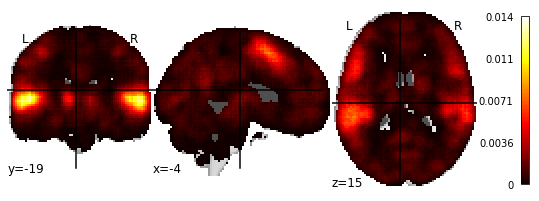

In [8]:
plotting.plot_stat_map(prob_img, title='')

In [4]:

import rdflib
import pandas as pd
path = './owlapi.xrdf'
load_format = None

g = rdflib.Graph()
g.load(path, format=load_format)
gdf = pd.DataFrame(iter(g))
gdf = gdf.astype(str)
gdf.columns = ['Entity', 'Property', 'Value']

In [5]:
gdf[gdf.Value == 'Pain']

,Entity,Property,Value
878516,http://purl.jp/bio/4/id/kb0000001532,http://www.w3.org/2000/01/rdf-schema#label,Pain
1509687,http://purl.jp/bio/4/id/kb0000001532,http://www.w3.org/2004/02/skos/core#altLabel,Pain
1552481,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2000/01/rdf-schema#label,Pain
1685121,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#altLabel,Pain


In [80]:
gdf[gdf.Entity.str.contains('http://purl.jp/bio/4/id/200906012659235956')]

,Entity,Property,Value
31639,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2000/01/rdf-schema#label,疼痛
43490,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906008469712785
49177,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906025492653291
84794,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/201006019477276644
155818,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2000/01/rdf-schema#label,Ache
176536,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906099297278889
193542,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906089582132876
232146,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2000/01/rdf-schema#label,とう痛
242521,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906098252110697
248146,http://purl.jp/bio/4/id/200906012659235956,http://purl.org/dc/terms/subject,http://purl.jp/bio/4/subject/LS51


In [6]:
gdf[gdf.Entity.str.contains('http://purl.jp/bio/4/id/200906087442648500')]

,Entity,Property,Value
14791,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906012659235956
33895,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2000/01/rdf-schema#label,nociceptive stimuli
94116,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#prefLabel,nociceptive stimuli
132819,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Class
546352,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2000/01/rdf-schema#label,nociceptive stimulus
602303,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#altLabel,nocuous stimulus
613654,http://purl.jp/bio/4/id/200906087442648500,http://purl.org/dc/terms/subject,http://purl.jp/bio/4/subject/LS51
637063,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#broader,http://purl.jp/bio/4/id/200906066643737725
871667,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#altLabel,侵害刺激
954637,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2000/01/rdf-schema#seeAlso,http://jglobal.jst.go.jp/en/detail?JGLOBAL_ID=...


In [7]:
pain = gdf[gdf.Entity.str.contains('http://purl.jp/bio/4/id/200906012659235956')]

In [8]:
pain[pain.Value.str.contains('http://purl.jp/bio/4/id/200906087442648500')]

,Entity,Property,Value
1180786,http://purl.jp/bio/4/id/200906012659235956,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906087442648500


In [9]:
gdf[gdf.Entity.str.contains('http://purl.jp/bio/4/id/200906087442648500')]

,Entity,Property,Value
14791,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#related,http://purl.jp/bio/4/id/200906012659235956
33895,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2000/01/rdf-schema#label,nociceptive stimuli
94116,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#prefLabel,nociceptive stimuli
132819,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Class
546352,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2000/01/rdf-schema#label,nociceptive stimulus
602303,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#altLabel,nocuous stimulus
613654,http://purl.jp/bio/4/id/200906087442648500,http://purl.org/dc/terms/subject,http://purl.jp/bio/4/subject/LS51
637063,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#broader,http://purl.jp/bio/4/id/200906066643737725
871667,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2004/02/skos/core#altLabel,侵害刺激
954637,http://purl.jp/bio/4/id/200906087442648500,http://www.w3.org/2000/01/rdf-schema#seeAlso,http://jglobal.jst.go.jp/en/detail?JGLOBAL_ID=...


In [33]:
#pain1 = gdf[gdf.Value == 'Pain']
import pandas as pd
pain = gdf[gdf.Value == 'Pain']
pain1 = gdf[gdf.Entity.str.contains('http://purl.jp/bio/4/id/200906087442648500')]
pain2 = gdf[gdf.Entity.str.contains('http://purl.jp/bio/4/id/200906012659235956')]
df = pd.concat((pain, pain1, pain2))

In [34]:
from neurolang.datalog.ontologies_parser import OntologiesParser
from neurolang.datalog.ontologies_rewriter import OntologyRewriter

from neurolang.datalog.constraints_representation import DatalogConstraintsProgram
from neurolang.expression_walker import ExpressionBasicEvaluator

from neurolang import frontend as fe

class Datalog(DatalogConstraintsProgram, ExpressionBasicEvaluator):
    pass

paths = ['./owlapi.xrdf']
namespaces = ['http://www.w3.org/2004/02/skos']
onto = OntologiesParser(paths, namespaces, df)
#dl = Datalog()
nl = fe.NeurolangDL()
datalog_program = onto.parse_ontology(nl.solver)

In [55]:
from operator import eq
from neurolang.logic import Implication
from nilearn import datasets
import nibabel as nib
from neurolang.frontend.query_resolution import RegionMixin
from neurolang.expressions import ExpressionBlock, Symbol, Constant
from neurolang.logic import Implication
from neurolang.datalog.aggregation import AggregationApplication
import typing
from neurolang.regions import Region

inter_reg = Symbol('inter_reg')
active_region = Symbol('active_region')

w = Symbol('w')
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
eq_ = Constant(eq)
id_ontology = Symbol('id_ontology')
rel = Symbol('rel')
ans = Symbol('ans')
over = Symbol('over')
sub = Symbol('sub')
name = Symbol('name')

neurosynth_region = Symbol('neurosynth_region')
neurosynth_rv = Symbol('neurosynth_rv')
region2voxel = Symbol('region2voxel')

label = Symbol('http://www.w3.org/2000/01/rdf-schema#label')
subClassOf = Symbol('http://www.w3.org/2000/01/rdf-schema#subClassOf')
region = Symbol('region')
related = Symbol('http://www.w3.org/2004/02/skos/core#related')
altLabel = Symbol('http://www.w3.org/2004/02/skos/core#altLabel')

#relations_list = get_destrieux_relations()
#r_name = tuple([relation_name(C_(destrieux), C_(fma)) for destrieux, fma in relations_list])

@nl.add_symbol
def region_volume(region: fe.ExplicitVBR) -> float:
    volume = (
        len(region.voxels) *
        float(np.product(np.abs(np.linalg.eigvals(region.affine[:-1, :-1]))))
    )
    return volume  

@nl.add_symbol
def region_union(
    region_set: typing.AbstractSet[Region]
) -> Region:
    return region_union_(region_set)

@nl.add_symbol
def region_intersection(
    region_left: Region, region_right: Region
) -> Region:
    
    r_ijk = region_right.to_ijk(region_left.affine)
    region_right = ExplicitVBR(r_ijk, region_left.affine, image_dim=region_left.image_dim)
    temp = region_intersection_((region_left, region_right))
    if temp is None:
        return ExplicitVBR([[0,0,0]], region_left.affine)
    return temp

@nl.add_symbol
def first_word(name: str) -> str:
    return name.split(" ")[0]


region_union = nl.symbols.region_union.expression()
region_union.args = (z,)

region_intersection = nl.symbols.region_intersection.expression()
region_intersection.args = (x, y)

agap = AggregationApplication(region_union.functor, (z,))

overlapping = nl.symbols.overlapping.expression()
overlapping.args = (x,y)

#first_word = nl.symbols.first_word.expression()
#first_word.args = (x, )
#first = AggregationApplication(first_word.functor, (x,))

#Auditory
imps = tuple()
#y = 56
imps += (Implication(id_ontology(y), label(y, Constant('Pain'))),)
# 56 erlated 500
imps += (Implication(rel(y), related(x, y) & id_ontology(x)),)
#500 altLabel strings
imps += (Implication(over(y), altLabel(x, y) & rel(x)),)

imps += (Implication(name(y), label(x, y) & id_ontology(x)),)
imps += (Implication(name(y), over(y)),)
#imps += (Implication(ans(first(y)), name(y)),)
qB2 = ExpressionBlock(imps)

from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.datalog.aggregation import DatalogWithAggregationMixin

class DatalogTranslator(
    TranslateToLogic, ew.IdentityWalker, DatalogWithAggregationMixin
):
    pass

dt = DatalogTranslator()
qB2 = dt.walk(qB2)

In [56]:
const = datalog_program.get_constraints()
const = dt.walk(const)

orw = OntologyRewriter(qB2, const)
rewrite = orw.Xrewrite()

KeyboardInterrupt: 

In [ ]:
from neurolang.datalog import DatalogProgram
from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.regions import region_intersection as region_intersection_, ExplicitVBR
from neurolang.datalog.aggregation import DatalogWithAggregationMixin
    
triple = Symbol('triple')
class Datalog2(TranslateToLogic,
    DatalogWithAggregationMixin, DatalogProgram,
    ExpressionBasicEvaluator):
    pass

dl2 = Datalog2()
dl2.add_extensional_predicate_from_tuples(triple, [(a.args[0].value, a.args[1].value, a.args[2].value) for a in onto.triples])

In [ ]:
eB2 = ()
for imp in rewrite:
    eB2 += (imp[0],)
    
eB2 = ExpressionBlock(eB2)

dt = DatalogTranslator()
eB22 = dt.walk(eB2)
dl2.walk(eB22)

In [92]:
from neurolang.datalog.chase import ChaseSemiNaive, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
from neurolang.datalog.aggregation import Chase

class Chase2(
    Chase, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
):
    pass

dc = Chase2(dl2)
solution_instance = dc.build_chase_solution()
list(solution_instance.keys())

[S{triple: typing.AbstractSet[typing.Tuple[str, str, str]]},
 S{id_ontology: Unknown},
 S{ans: Unknown},
 S{over: Unknown},
 S{rel: Unknown}]

In [93]:
list(solution_instance['ans'].value.unwrapped_iter())

[('Pain',),
 ('疼痛',),
 ('Ache',),
 ('とう痛',),
 ('痛み',),
 ('pain',),
 ('ache',),
 ('nocuous stimulus',),
 ('侵害刺激',),
 ('nociceptive stimulus',),
 ('nociceptive stimuli',),
 ('noxious stimulus',)]